# Simple Linear Regression

# Importing Libraries

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import pylab

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error as mse, mean_absolute_error as mae, r2_score

In [58]:
df=pd.read_csv("placement.csv")

In [59]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [60]:
df.shape

(200, 2)

In [61]:
df.isnull().sum()/len(df)*100

cgpa       0.0
package    0.0
dtype: float64

In [62]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [63]:
df.duplicated().sum()/len(df)*100

0.0

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


# linear regression is parametric algorithms
# Assumption
# 1) linearity : there should be linear relationship btw independent and target variable

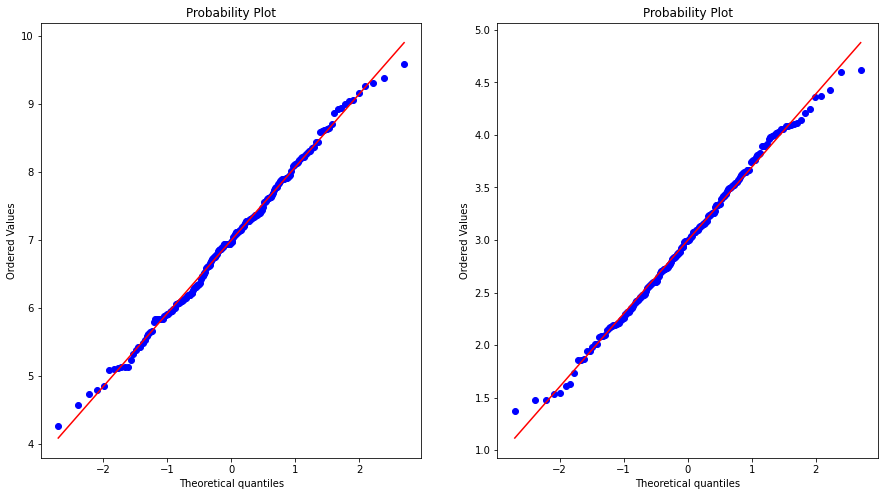

In [111]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
st.probplot(df['cgpa'],dist='norm',plot=pylab)

plt.subplot(1,2,2)
st.probplot(df['package'],dist='norm',plot=pylab);

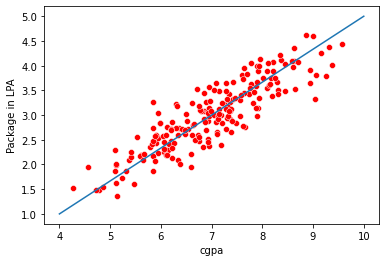

In [98]:
plt.xlabel('cgpa')
plt.ylabel('Package in LPA')
plt.plot([4, 10], [1, 5])
sns.scatterplot(x='cgpa',y='package',color='red',data=df);

<AxesSubplot:>

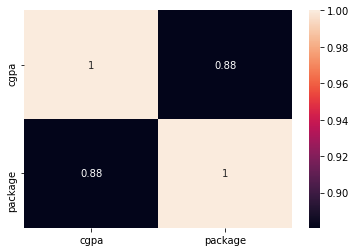

In [67]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

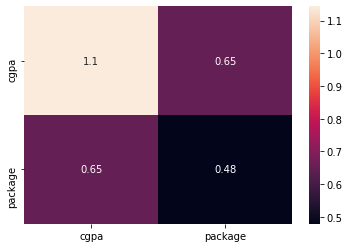

In [68]:
sns.heatmap(df.cov(),annot=True)

In [69]:
# seggregation the data

In [70]:
x=df.drop(columns=['package'])
y=df['package']

# splitting x and y in train and testing

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [73]:
print("Thse shape of x_train",x_train.shape)
print("Thse shape of y_train",y_train.shape)
print("Thse shape of x_test",x_test.shape)
print("Thse shape of y_test",y_test.shape)

Thse shape of x_train (160, 1)
Thse shape of y_train (160,)
Thse shape of x_test (40, 1)
Thse shape of y_test (40,)


# Model_Building

In [75]:
LR=LinearRegression()

In [76]:
LR.fit(x_train,y_train)

LinearRegression()

In [101]:
b=LR.intercept_  #b which machine learn to draw bestfit line
b

-1.02700693745421

In [102]:
m=LR.coef_ # m which machine learn to draw bestfit line
m

array([0.57425647])

In [79]:
y_pred=LR.predict(x_test)

In [80]:
y_pred_train=LR.predict(x_train)

# Checking Accuracy Of Model

In [81]:
r2_score(y_pred,y_test)

0.733797338294438

In [82]:
r2_score(y_pred_train,y_train)

0.7110643184280329

Text(0, 0.5, 'Package in LPA')

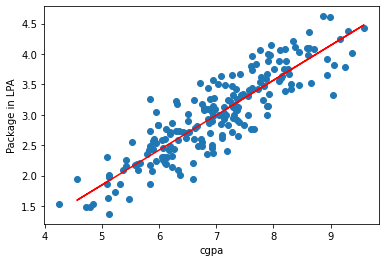

In [93]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train['cgpa'],LR.predict(x_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('Package in LPA')

Text(0, 0.5, 'Package in LPA')

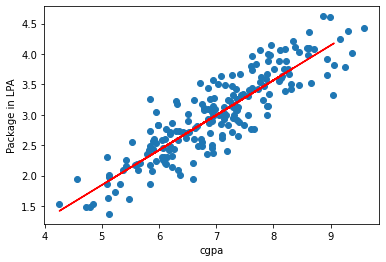

In [100]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test['cgpa'],LR.predict(x_test),color='red')
plt.xlabel('cgpa')
plt.ylabel('Package in LPA')

# Checking accuracy on other metrices

In [83]:
mae=mae(y_pred,y_test)

In [84]:
mae

0.23150985393278373

In [85]:
mse=mse(y_pred,y_test)

In [86]:
mse

0.08417638361329657

In [87]:
rmse=np.sqrt(mse)

In [88]:
rmse

0.2901316659954521

# Prediction testing

In [113]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [114]:
df.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [118]:
y = m*(7.21)+b   #predicting 197 row
y

array([3.11338223])

In [120]:
y = m*(5.12)+b   #predicting 1 row
y

array([1.9131862])